In [1]:
# Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read Tornado data
csv_file = "data/1950-2019_all_tornadoes.csv"
df = pd.read_csv(csv_file)
df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.50,150,2,0,1,0,0,0,0,0
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.20,150,2,1,2,189,0,0,0,0
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,3.30,100,2,1,2,119,0,0,0,0
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.60,130,1,1,1,135,0,0,0,0
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.10,10,1,1,1,161,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66383,618537,2019,12,29,2019-12-29,16:03:00,3,MS,28,0,...,7.70,900,1,1,1,7,0,0,0,0
66384,618538,2019,12,29,2019-12-29,16:13:00,3,MS,28,0,...,3.82,200,1,1,1,19,0,0,0,0
66385,618539,2019,12,29,2019-12-29,16:32:00,3,MS,28,0,...,2.61,200,1,1,1,105,0,0,0,0
66386,618540,2019,12,29,2019-12-29,17:13:00,3,MS,28,0,...,3.23,125,1,1,1,101,0,0,0,0


## Data Cleaning

In [3]:
df.dtypes

om         int64
yr         int64
mo         int64
dy         int64
date      object
time      object
tz         int64
st        object
stf        int64
stn        int64
mag        int64
inj        int64
fat        int64
loss     float64
closs    float64
slat     float64
slon     float64
elat     float64
elon     float64
len      float64
wid        int64
ns         int64
sn         int64
sg         int64
f1         int64
f2         int64
f3         int64
f4         int64
fc         int64
dtype: object

In [4]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [5]:
# Select tornado data from the year 1983 onwards
filtered_df = df.loc[df.yr >= 2016, :]
filtered_df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
61217,613495,2016,1,6,2016-01-06,10:50:00,3,CA,6,0,...,0.61,20,1,1,1,69,0,0,0,0
61218,613496,2016,1,8,2016-01-08,05:30:00,3,FL,12,0,...,0.09,20,1,1,1,87,0,0,0,0
61219,613497,2016,1,9,2016-01-09,17:45:00,3,FL,12,0,...,3.35,182,1,1,1,71,0,0,0,0
61220,613498,2016,1,15,2016-01-15,10:10:00,3,FL,12,0,...,0.19,45,1,1,1,71,0,0,0,0
61221,613499,2016,1,17,2016-01-17,02:10:00,3,FL,12,0,...,1.15,350,1,1,1,115,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66383,618537,2019,12,29,2019-12-29,16:03:00,3,MS,28,0,...,7.70,900,1,1,1,7,0,0,0,0
66384,618538,2019,12,29,2019-12-29,16:13:00,3,MS,28,0,...,3.82,200,1,1,1,19,0,0,0,0
66385,618539,2019,12,29,2019-12-29,16:32:00,3,MS,28,0,...,2.61,200,1,1,1,105,0,0,0,0
66386,618540,2019,12,29,2019-12-29,17:13:00,3,MS,28,0,...,3.23,125,1,1,1,101,0,0,0,0


In [6]:
# Select derired columns
df1 = filtered_df[['yr', 'mo', 'st', 'mag', 'inj', 'fat',\
                   'loss', 'closs', 'len', 'wid', 'slat', 'slon']]
df1

,yr,mo,st,mag,inj,fat,loss,closs,len,wid,slat,slon
61217,2016,1,CA,0,0,0,0.0,75000.0,0.61,20,36.9381,-121.3815
61218,2016,1,FL,0,0,0,2000.0,0.0,0.09,20,24.7315,-81.0139
61219,2016,1,FL,2,3,0,2000000.0,0.0,3.35,182,26.5700,-82.0370
61220,2016,1,FL,1,0,0,200000.0,0.0,0.19,45,26.5503,-81.9126
61221,2016,1,FL,2,2,0,12000000.0,0.0,1.15,350,27.2530,-82.5396
...,...,...,...,...,...,...,...,...,...,...,...,...
66383,2019,12,MS,1,0,0,75000.0,0.0,7.70,900,33.1628,-89.4323
66384,2019,12,MS,1,0,0,10000.0,0.0,3.82,200,33.2598,-89.2778
66385,2019,12,MS,0,0,0,5000.0,0.0,2.61,200,33.4720,-89.0315
66386,2019,12,MS,1,0,0,150000.0,0.0,3.23,125,32.5268,-89.1628


In [7]:
df1.reset_index(inplace = True, drop = True)
df1

,yr,mo,st,mag,inj,fat,loss,closs,len,wid,slat,slon
0,2016,1,CA,0,0,0,0.0,75000.0,0.61,20,36.9381,-121.3815
1,2016,1,FL,0,0,0,2000.0,0.0,0.09,20,24.7315,-81.0139
2,2016,1,FL,2,3,0,2000000.0,0.0,3.35,182,26.5700,-82.0370
3,2016,1,FL,1,0,0,200000.0,0.0,0.19,45,26.5503,-81.9126
4,2016,1,FL,2,2,0,12000000.0,0.0,1.15,350,27.2530,-82.5396
...,...,...,...,...,...,...,...,...,...,...,...,...
5166,2019,12,MS,1,0,0,75000.0,0.0,7.70,900,33.1628,-89.4323
5167,2019,12,MS,1,0,0,10000.0,0.0,3.82,200,33.2598,-89.2778
5168,2019,12,MS,0,0,0,5000.0,0.0,2.61,200,33.4720,-89.0315
5169,2019,12,MS,1,0,0,150000.0,0.0,3.23,125,32.5268,-89.1628


In [8]:
# States Data
data = {'StName':['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']}

states_df = pd.DataFrame(data)
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'

states = pd.read_html(cw_location + cw_filename)[0]
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
states_df['StAbbr'] = states_df['StName'].map(state_code_map)
code_state_map = dict(zip(states['Code'],
                          states['Description']))
states_df['StNameAgain'] = states_df['StAbbr'].map(code_state_map)
states_df = states_df.rename(columns={'stName': 'State_Name', 'StAbbr': 'st'})
states_df.head()

,StName,st,StNameAgain
0,Alabama,AL,Alabama
1,Alaska,AK,Alaska
2,Arizona,AZ,Arizona
3,Arkansas,AR,Arkansas
4,California,CA,California


In [9]:
states_df.columns

Index(['StName', 'st', 'StNameAgain'], dtype='object')

In [10]:
# Merge dataframes
new_df2 = pd.merge(df1, states_df, on='st', how='left')
# new_df2
df3 = new_df2[[
'yr',
'mo',
'st',
'mag',
'inj',
'fat',
'loss',
'closs',
'len',
'wid',
'slat',
'slon',
'StName']]
df3

,yr,mo,st,mag,inj,fat,loss,closs,len,wid,slat,slon,StName
0,2016,1,CA,0,0,0,0.0,75000.0,0.61,20,36.9381,-121.3815,California
1,2016,1,FL,0,0,0,2000.0,0.0,0.09,20,24.7315,-81.0139,Florida
2,2016,1,FL,2,3,0,2000000.0,0.0,3.35,182,26.5700,-82.0370,Florida
3,2016,1,FL,1,0,0,200000.0,0.0,0.19,45,26.5503,-81.9126,Florida
4,2016,1,FL,2,2,0,12000000.0,0.0,1.15,350,27.2530,-82.5396,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,2019,12,MS,1,0,0,75000.0,0.0,7.70,900,33.1628,-89.4323,Mississippi
5167,2019,12,MS,1,0,0,10000.0,0.0,3.82,200,33.2598,-89.2778,Mississippi
5168,2019,12,MS,0,0,0,5000.0,0.0,2.61,200,33.4720,-89.0315,Mississippi
5169,2019,12,MS,1,0,0,150000.0,0.0,3.23,125,32.5268,-89.1628,Mississippi


In [11]:
df_clean = df3.copy()
df_clean

,yr,mo,st,mag,inj,fat,loss,closs,len,wid,slat,slon,StName
0,2016,1,CA,0,0,0,0.0,75000.0,0.61,20,36.9381,-121.3815,California
1,2016,1,FL,0,0,0,2000.0,0.0,0.09,20,24.7315,-81.0139,Florida
2,2016,1,FL,2,3,0,2000000.0,0.0,3.35,182,26.5700,-82.0370,Florida
3,2016,1,FL,1,0,0,200000.0,0.0,0.19,45,26.5503,-81.9126,Florida
4,2016,1,FL,2,2,0,12000000.0,0.0,1.15,350,27.2530,-82.5396,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,2019,12,MS,1,0,0,75000.0,0.0,7.70,900,33.1628,-89.4323,Mississippi
5167,2019,12,MS,1,0,0,10000.0,0.0,3.82,200,33.2598,-89.2778,Mississippi
5168,2019,12,MS,0,0,0,5000.0,0.0,2.61,200,33.4720,-89.0315,Mississippi
5169,2019,12,MS,1,0,0,150000.0,0.0,3.23,125,32.5268,-89.1628,Mississippi


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


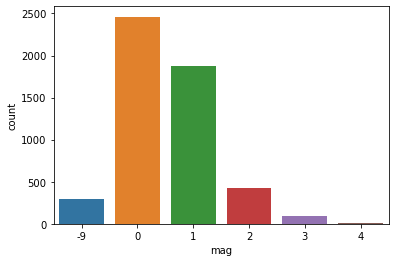

In [12]:
import seaborn as sns
sns.countplot(df_clean["mag"], label="Count")
plt.show()

In [13]:
# Select the rows where magnitude >= 0
df_magfilt = df_clean[df_clean['mag'] >= 0]
df_magfilt

,yr,mo,st,mag,inj,fat,loss,closs,len,wid,slat,slon,StName
0,2016,1,CA,0,0,0,0.0,75000.0,0.61,20,36.9381,-121.3815,California
1,2016,1,FL,0,0,0,2000.0,0.0,0.09,20,24.7315,-81.0139,Florida
2,2016,1,FL,2,3,0,2000000.0,0.0,3.35,182,26.5700,-82.0370,Florida
3,2016,1,FL,1,0,0,200000.0,0.0,0.19,45,26.5503,-81.9126,Florida
4,2016,1,FL,2,2,0,12000000.0,0.0,1.15,350,27.2530,-82.5396,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,2019,12,MS,1,0,0,75000.0,0.0,7.70,900,33.1628,-89.4323,Mississippi
5167,2019,12,MS,1,0,0,10000.0,0.0,3.82,200,33.2598,-89.2778,Mississippi
5168,2019,12,MS,0,0,0,5000.0,0.0,2.61,200,33.4720,-89.0315,Mississippi
5169,2019,12,MS,1,0,0,150000.0,0.0,3.23,125,32.5268,-89.1628,Mississippi


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


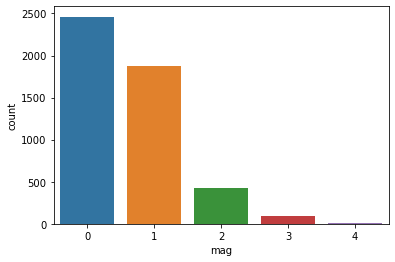

In [15]:
sns.countplot(df_magfilt["mag"], label="Count")
plt.show()

In [17]:
df_magfilt['adjusted magnitude'] = df_magfilt['mag']
df_magfilt = df_magfilt.replace({'adjusted magnitude': {3: 2, 4: 2, 5:2}})
df_magfilt

<ipython-input-17-42069892d478>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_magfilt['adjusted magnitude'] = df_magfilt['mag']


,yr,mo,st,mag,inj,fat,loss,closs,len,wid,slat,slon,StName,adjusted magnitude
0,2016,1,CA,0,0,0,0.0,75000.0,0.61,20,36.9381,-121.3815,California,0
1,2016,1,FL,0,0,0,2000.0,0.0,0.09,20,24.7315,-81.0139,Florida,0
2,2016,1,FL,2,3,0,2000000.0,0.0,3.35,182,26.5700,-82.0370,Florida,2
3,2016,1,FL,1,0,0,200000.0,0.0,0.19,45,26.5503,-81.9126,Florida,1
4,2016,1,FL,2,2,0,12000000.0,0.0,1.15,350,27.2530,-82.5396,Florida,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,2019,12,MS,1,0,0,75000.0,0.0,7.70,900,33.1628,-89.4323,Mississippi,1
5167,2019,12,MS,1,0,0,10000.0,0.0,3.82,200,33.2598,-89.2778,Mississippi,1
5168,2019,12,MS,0,0,0,5000.0,0.0,2.61,200,33.4720,-89.0315,Mississippi,0
5169,2019,12,MS,1,0,0,150000.0,0.0,3.23,125,32.5268,-89.1628,Mississippi,1


In [19]:
df_magfilt["adjusted magnitude"].value_counts()

0    2461
1    1881
2     531
Name: adjusted magnitude, dtype: int64

In [20]:
df_magfilt["mag"].max()

4

In [21]:
df_magfilt.columns

Index(['yr', 'mo', 'st', 'mag', 'inj', 'fat', 'loss', 'closs', 'len', 'wid',
       'slat', 'slon', 'StName', 'adjusted magnitude'],
      dtype='object')

## Machine Learning